# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests
import re

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find("table",attrs={"class":"table table-striped table-hover table-hover-solid-row table-simple history-data"})
tablebody = table.find("tbody")

print(tablebody.prettify()[1:500])

tbody>
 <tr>
  <td>
   3/4/2021
  </td>
  <td>
   Thursday
  </td>
  <td>
   <a href="/Rate/USD/IDR/3-4-2021">
    14,261.85426
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/IDR/3-4-2021">
    USD IDR rate for 3/4/2021
   </a>
  </td>
 </tr>
 <tr>
  <td>
   3/3/2021
  </td>
  <td>
   Wednesday
  </td>
  <td>
   <a href="/Rate/USD/IDR/3-3-2021">
    14,257.29443
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/IDR/3-3-2


In [5]:
tr = tablebody.find_all("tr",attrs={"class":""})
#tr[:30] 

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all("tr",attrs={"class":""})[i]
        
    #scrapping process
    
    #getDate
    date = row.find_all("td")[0].text
    date = date.strip()
        
    #getDayName
    dayName = row.find_all("td")[1].text
    dayName = dayName.strip()
    
    #getKurs
    kurs = row.find_all("td")[2].text
    kurs = kurs.replace("IDR","")
    kurs = kurs.replace(',','')

    
    temp.append((date,dayName,kurs))
    
    
temp

[('3/3/2021', 'Wednesday', '14257.29443 '),
 ('3/2/2021', 'Tuesday', '14256.28041 '),
 ('3/1/2021', 'Monday', '14248.60576 '),
 ('2/26/2021', 'Friday', '14300.27815 '),
 ('2/25/2021', 'Thursday', '14139.73096 '),
 ('2/24/2021', 'Wednesday', '14083.03673 '),
 ('2/23/2021', 'Tuesday', '14092.64503 '),
 ('2/22/2021', 'Monday', '14118.07274 '),
 ('2/19/2021', 'Friday', '14066.79375 '),
 ('2/18/2021', 'Thursday', '14013.51318 '),
 ('2/17/2021', 'Wednesday', '14015.16095 '),
 ('2/16/2021', 'Tuesday', '13935.96629 '),
 ('2/15/2021', 'Monday', '13918.18725 '),
 ('2/12/2021', 'Friday', '13988.54710 '),
 ('2/11/2021', 'Thursday', '13982.27900 '),
 ('2/10/2021', 'Wednesday', '13994.09212 '),
 ('2/9/2021', 'Tuesday', '13920.52018 '),
 ('2/8/2021', 'Monday', '14007.25257 '),
 ('2/5/2021', 'Friday', '14008.99630 '),
 ('2/4/2021', 'Thursday', '14020.87878 '),
 ('2/3/2021', 'Wednesday', '13997.60682 '),
 ('2/2/2021', 'Tuesday', '14004.60175 '),
 ('2/1/2021', 'Monday', '14025.27450 '),
 ('1/29/2021', '

## Creating data frame & Data wrangling

Put the array into dataframe

In [23]:
import pandas as pd

df = pd.DataFrame(temp)
df.columns=["tanggal","hari","kurs"]
df["tanggal"]=df["tanggal"].astype('datetime64')
df["hari"]=df["hari"].astype('category')
df["kurs"]=df["kurs"].astype('float64')

df.set_index('hari')

,tanggal,kurs
hari,,
Wednesday,2021-03-03,14257.29443
Tuesday,2021-03-02,14256.28041
Monday,2021-03-01,14248.60576
Friday,2021-02-26,14300.27815
Thursday,2021-02-25,14139.73096
...,...,...
Thursday,2020-09-10,14871.58664
Wednesday,2020-09-09,14783.50009
Tuesday,2020-09-08,14839.54267


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

- - merubah tipe tanggal dengan datetime
- - untuk kolom kurs hilangkan koma dan ubah menjadi float


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Text(0, 0.5, 'Kurs')

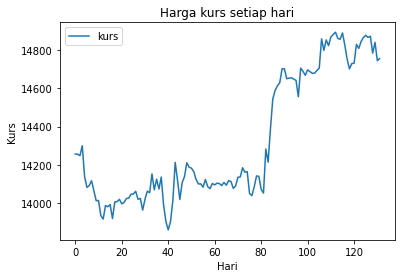

In [20]:
data = df[["hari","kurs"]].plot(title='Harga kurs setiap hari')
data.set_xlabel("Hari")
data.set_ylabel("Kurs")




(Put your analysis and conclusion here.)



### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.